In [136]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_csv_pgbar(csv_path, index_col=None, chunksize=1024, read_first=None):
    rows = sum(1 for _ in open(csv_path, 'r')) - 1
    chunk_list = []
    with tqdm(total=rows, desc=f'Reading {csv_path}') as pbar:
        i = 0
        for chunk in pd.read_csv(csv_path, index_col=index_col, chunksize=chunksize, sep='\t'):
            chunk_list.append(chunk)
            pbar.update(len(chunk))
            i += 1
            if i+1 == read_first:
                break
    df = pd.concat((f for f in chunk_list), axis=0)
    return df

### Загрузка данных

In [3]:
all_seq_traintest = read_csv_pgbar('FINAL_ALL_SEQUENCES_TRAINTEST.tsv', index_col=0, read_first=5)

Reading FINAL_ALL_SEQUENCES_TRAINTEST.tsv:   3%|▎         | 4096/123707 [00:00<00:06, 18715.43it/s]


In [4]:
feat_friends = read_csv_pgbar('FINAL_FEATURES_FRIENDS.tsv', index_col=0, read_first=5)

Reading FINAL_FEATURES_FRIENDS.tsv:   0%|          | 4096/9974289 [00:00<14:47, 11232.56it/s]


In [5]:
feat_traintest = read_csv_pgbar('FINAL_FEATURES_TRAINTEST.tsv', index_col=0)

Reading FINAL_FEATURES_TRAINTEST.tsv: 100%|██████████| 159288/159288 [00:13<00:00, 11703.49it/s]


In [6]:
seq_matrix = read_csv_pgbar('FINAL_SEQUENCES_MATRIX.tsv', read_first=5)

Reading FINAL_SEQUENCES_MATRIX.tsv:   0%|          | 4096/1489576 [00:00<00:15, 93970.98it/s]


In [97]:
targets_traintest = read_csv_pgbar('FINAL_TARGETS_DATES_TRAINTEST.tsv', index_col=0)

Reading FINAL_TARGETS_DATES_TRAINTEST.tsv: 100%|██████████| 159290/159290 [00:00<00:00, 375858.73it/s]


In [55]:
all_seq_traintest.head()

,SEQUENCE
CLIENT_ID,
1000100,"['e84b0f471b8e8f4aecc81eb27b16c092', '9a7670be..."
1000121,"['9804a8d70c5e8c26830bdafe2c2db49c', '9ca02fb0..."
1000131,"['b496d19eb25556bd64e481d11b6f7dd6', 'eb727f97..."
1000132,"['467a38fe36ef666e264823387f66f3c8', 'e0494409..."
100013,"['b496d19eb25556bd64e481d11b6f7dd6', 'fc18cab3..."


Клиент и последовательно переходов по состояниям

In [57]:
feat_friends.head()

,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,i1068,...,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9,FRIEND_ID
CLIENT_ID,,,,,,,,,,,,,,,,,,,,,
999819,0.0,0.0,8.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981973
999819,0.0,45.0,41.0,0.0,18.0,2.0,17.0,0.0,6.0,6.0,...,0.0,29.0,0.0,0.0,133.0,0.0,0.0,0.0,0.0,99981949
999819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981979
999819,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981939
999819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981975


Ребра плюс фичи вершин

In [8]:
feat_traintest.head()

,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,i1068,...,u8=17,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9
CLIENT_ID,,,,,,,,,,,,,,,,,,,,,
7150,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7154,0.0,16.0,156.0,0.0,0.0,20.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7156,0.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26966,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26993,0.0,27.0,153.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Фичи вершин

In [12]:
seq_matrix.head()

,SESSIONS_SEQUENCES
0,"['68a9902529901882ecd5143460468d4c', '79d75347..."
1,['72b88f72bca2636844bb14b9cd9e29b3']
2,"['b496d19eb25556bd64e481d11b6f7dd6', 'd21918bb..."
3,"['dcb3d50673073d3c023db102f21b2d3e', '09a5d816..."
4,"['3de59e26ee7e94a6ccd0a2eead2fab9a', '4a51f13a..."


In [98]:
targets_traintest.head()

,RETRO_DT,TARGET
CLIENT_ID,,
1011725,20210501,0
1018784,20210501,1
1021812,20210501,0
1024003,20210501,0
1025140,20210501,test


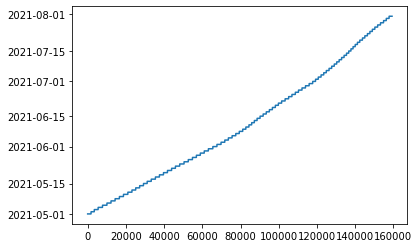

In [135]:
plt.plot(pd.to_datetime(targets_traintest.RETRO_DT, format='%Y%m%d').values);

### Подготовим индексы для трейна, валидации и теста

In [137]:
(targets_dates_traintest['TARGET'] == 'test').sum() / targets_dates_traintest.shape[0]

0.2

In [138]:
private_idx = targets_traintest[targets_traintest['TARGET'] == 'test'].index.values

In [208]:
_public_idx = targets_traintest[targets_traintest['TARGET'] != 'test'].index.values
public_idx = _public_idx[(_public_idx != 86181) & (_public_idx != 84024)]


In [209]:
len(private_idx), len(public_idx)

(31858, 127430)

In [210]:
np.random.seed(1)
mask = np.random.choice(['train', 'val', 'test'], size=len(public_idx), p=[0.6, 0.2, 0.2])

In [211]:
train_idx = public_idx[mask == 'train']
val_idx = public_idx[mask == 'val']
test_idx = public_idx[mask == 'test']
len(train_idx), len(val_idx), len(test_idx)

(76356, 25541, 25533)

In [222]:
public_targets = targets_traintest.loc[public_idx]
public_targets.TARGET = public_targets.TARGET.astype('int')

### EDA

In [223]:
public_targets.loc[train_idx, 'TARGET'].sum() / public_targets.loc[train_idx, 'TARGET'].shape[0]

0.27374404107077377

### Бейзлайн -- без графовых данных

In [224]:
sample_weight = public_targets.loc[train_idx, 'TARGET']
sample_weight[sample_weight == 0] = 0.27
sample_weight[sample_weight == 1] = 0.73
sample_weight

CLIENT_ID
1011725    0.27
1021812    0.27
1024003    0.27
1026390    0.73
1027507    0.73
           ... 
72459      0.27
72460      0.27
72630      0.27
72633      0.27
72634      0.73
Name: TARGET, Length: 76356, dtype: float64

In [225]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

In [ ]:
clf = make_pipeline(
    PCA(n_components=128),
    GradientBoostingClassifier(n_estimators=32, max_depth=4, verbose=1)
)
clf.fit(
    feat_traintest.loc[train_idx], 
    public_targets.loc[train_idx, 'TARGET'],
)

      Iter       Train Loss   Remaining Time 
         1           1.1724            2.23m
         2           1.1711            2.12m
         3           1.1698            2.10m
         4           1.1687            1.98m
         5           1.1677            1.91m
         6           1.1668            1.83m
         7           1.1658            1.76m
         8           1.1649            1.69m
         9           1.1641            1.64m
        10           1.1633            1.57m


In [227]:
val_target = clf.predict_proba(feat_traintest.loc[val_idx])
roc_auc_score(public_targets.loc[val_idx, 'TARGET'], val_target[:, 1])

0.5594793006688465

In [232]:
roc_auc_score(public_targets.loc[val_idx, 'TARGET'], np.random.rand(len(val_idx)))

0.49995814844739567

(array([8.300e+01, 2.206e+03, 7.694e+03, 1.203e+04, 3.430e+03, 7.600e+01,
        1.600e+01, 4.000e+00, 0.000e+00, 2.000e+00]),
 array([0.13682117, 0.17929884, 0.22177651, 0.26425418, 0.30673185,
        0.34920953, 0.3916872 , 0.43416487, 0.47664254, 0.51912021,
        0.56159788]),
 <BarContainer object of 10 artists>)

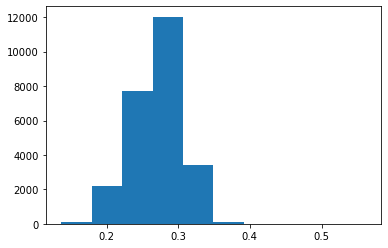

In [233]:
plt.hist(val_target[:, 1])

### Предсказания

In [228]:
sample_weight = public_targets.loc[:, 'TARGET'].copy()
sample_weight[sample_weight == 0] = 0.27
sample_weight[sample_weight == 1] = 0.73
sample_weight

CLIENT_ID
1011725    0.27
1018784    0.73
1021812    0.27
1024003    0.27
1026390    0.73
           ... 
72630      0.27
72633      0.27
72634      0.73
72641      0.27
72643      0.27
Name: TARGET, Length: 127430, dtype: float64

In [229]:
clf.fit(
    feat_traintest.loc[public_idx],
    public_targets.loc[public_idx, 'TARGET'],
    gradientboostingclassifier__sample_weight=sample_weight,
)

      Iter       Train Loss   Remaining Time 
         1           1.3843            3.74m
         2           1.3827            3.60m
         3           1.3814            3.46m
         4           1.3802            3.37m
         5           1.3791            3.35m
         6           1.3781            3.32m
         7           1.3773            3.18m
         8           1.3764            3.10m
         9           1.3757            2.95m
        10           1.3749            2.80m
        20           1.3689            1.51m
        30           1.3639           14.94s


Pipeline(steps=[('pca', PCA(n_components=128)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=4, n_estimators=32,
                                            verbose=1))])

In [242]:
private_idx_order = pd.read_csv('sample_submission.csv')['CLIENT_ID']

In [244]:
private_pred = clf.predict_proba(feat_traintest.loc[private_idx_order])
pd.DataFrame(
    {
        'CLIENT_ID': private_idx_order,
        'TARGET':  private_pred[:, 1]
    }
).to_csv('private_pred23_23_39.csv', index=False)

### Grid search CV

In [199]:
cv = GridSearchCV(
    clf, 
    param_grid={
        'gradientboostingclassifier__n_estimators': [16, 32, 64],
        'gradientboostingclassifier__max_depth': [2, 4, 8],
        'pca__n_components': [32, 64, 128]
    },
    verbose=1
)
cv.fit(
    feat_traintest.loc[train_idx], 
    public_targets.loc[train_idx, 'TARGET'],
    gradientboostingclassifier__sample_weight=sample_weight,
)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
      Iter       Train Loss   Remaining Time 
         1           1.3857            6.26s
         2           1.3853            5.86s
         3           1.3849            5.35s
         4           1.3845            4.89s
         5           1.3842            4.55s
         6           1.3838            4.22s
         7           1.3835            3.85s
         8           1.3833            3.43s
         9           1.3830            3.01s
        10           1.3828            2.60s
      Iter       Train Loss   Remaining Time 
         1           1.3856            6.86s
         2           1.3851            6.45s
         3           1.3847            5.81s
         4           1.3843            5.43s
         5           1.3840            4.97s
         6           1.3837            4.53s
         7           1.3834            4.05s
         8           1.3832            3.60s
         9           1.3829         

KeyboardInterrupt: 

0.5475728899355483